<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/%D0%9F%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D0%B0%D1%8F_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%90%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная: 

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [0]:
import numpy as np
# a) диагональная, ортогональная, но не единичная(!)
A = np.array([[0,0,1],
              [1,0,0],
              [0,1,0]])

In [0]:
# b) верхнетреугольная, ортогональная:
B = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

In [0]:
# c) нижнетреугольная, ортогональная:
C = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

In [0]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:
D = np.array([[1,1,1],
              [1,1,2],
              [2,1,1]])

np.linalg.det(D)

1.0

In [28]:
j = np.array([[1,3],
              [2,4]])

np.linalg.det(j)

-2.0

In [29]:
k = np.array([[2,1],
              [1,3]])

np.linalg.det(k)

5.000000000000001

In [0]:
# e) матрица (3x3), у которой определитель = 1:
D = np.array([[1,1,1],
              [1,1,2],
              [2,1,1]])

np.linalg.det(D)

1.0

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [0]:
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [0]:
np.linalg.eig(m)

(array([1., 4.]), array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [0]:
f = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(f)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [0]:
np.linalg.eig(f)

(array([6., 3., 3.]), array([[-0.57735027, -0.81649658,  0.15430335],
        [-0.57735027,  0.40824829,  0.6172134 ],
        [ 0.57735027, -0.40824829,  0.77151675]]))

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [0]:
lm = np.array([[1, 2],
              [2,3]])
print(lm)

[[1 2]
 [2 3]]


In [0]:
np.linalg.svd(lm)

(array([[-0.53, -0.85],
        [-0.85, 0.53]]), array([4.24, 0.24]), array([[-0.53, -0.85],
        [0.85, -0.53]]))

### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [0]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [0]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [0]:
X, y = load_digits(return_X_y=True)

In [0]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


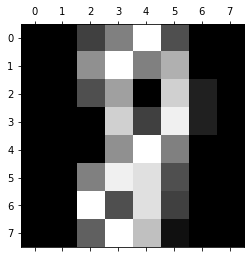

In [34]:
image = X[53]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [51]:
svd = TruncatedSVD(n_components=3)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.3136664855069512

In [49]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9710628825820813

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

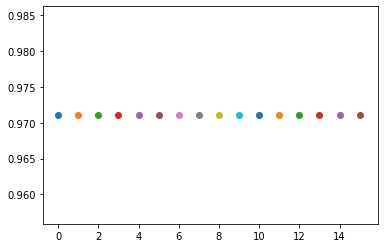

In [53]:
for i in range(0,16):

  svd = TruncatedSVD(n_components=i)
  plt.scatter(i, rf_reduced.oob_score_)
